# 파이썬을 활용한 RFM 분석

## 1. 데이터 불러오기(Data Import)

온라인 소매거래 내역 데이터(Online Retail Data)

- 영국에 기반한 온라인 소매 거래 사이트에서 2010년 12월 1일부터 2011년 12월 9일까지 1년 동안의 온라인 리테일 거래 내역 데이터

데이터 컬럼(속성)
- InvoiceNo : 송장번호
- StockCode : 각 제품에 부여된 서로 구분되는 코드
- Description : 각 제품에 대한 설명
- Quantity : 구매 수량
- InvoiceDate : 발송 날짜
- UnitPrice : 개당 가격
- CustomerID : 각 고객에게 유일하게 부여되는 고객 ID
- Country : 배송 국가

In [1]:
# 관련 모듈 불러오기
import pandas 
import numpy 
from datetime import datetime

In [6]:
# 'Online Retail.xlsx'파일 불러오기
# 방법1. read_excel()함수를 활용하여 데이터를 url에서 직접 불러올 수 있음
data = pandas.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

# 방법2. 미리 받은 데이터 셋 불러옴 
# data = pandas.read_excel('data/Online Retail.xlsx')

In [7]:
# 데이터 확인
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [8]:
data.shape

(541909, 8)

## 2. 데이터 전처리 (Data Preprocessing)

In [9]:
# 행 삭제 : 데이터가 너무 크므로 10,000개까지의 데이터만 포함해서 분석
# use only last 10000 instances to save computational resources and time

data = data[531909:]
data.shape

(10000, 8)

In [10]:
data.head()    # 마지막 10000행의 데이터만 추출된 것을 볼 수 있다

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
531909,580979,23391,I LOVE LONDON MINI BACKPACK,4,2011-12-06 15:40:00,4.15,12362.0,Belgium
531910,580979,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-12-06 15:40:00,0.85,12362.0,Belgium
531911,580979,21931,JUMBO STORAGE BAG SUKI,10,2011-12-06 15:40:00,2.08,12362.0,Belgium
531912,580979,23199,JUMBO BAG APPLES,10,2011-12-06 15:40:00,2.08,12362.0,Belgium
531913,580979,23202,JUMBO BAG VINTAGE LEAF,10,2011-12-06 15:40:00,2.08,12362.0,Belgium


In [11]:
# 분석에 불필요한 열 제거
data = data[['Quantity', 'InvoiceDate','UnitPrice','CustomerID']]
data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
531909,4,2011-12-06 15:40:00,4.15,12362.0
531910,10,2011-12-06 15:40:00,0.85,12362.0
531911,10,2011-12-06 15:40:00,2.08,12362.0
531912,10,2011-12-06 15:40:00,2.08,12362.0
531913,10,2011-12-06 15:40:00,2.08,12362.0


In [12]:
# 데이터를 'InvoiceDate'열을 기준으로 내림차순 정렬
data = data.sort_values(by = ['InvoiceDate'], ascending = False)
data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
541908,3,2011-12-09 12:50:00,4.95,12680.0
541901,8,2011-12-09 12:50:00,1.95,12680.0
541895,12,2011-12-09 12:50:00,1.65,12680.0
541896,12,2011-12-09 12:50:00,1.65,12680.0
541897,4,2011-12-09 12:50:00,3.75,12680.0


In [13]:
# 'TotalPrice'열을 새로 만들고 'UnitPrice'와 'Quantity'값을 곱해 그 값들을 저장 
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']
data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
541908,3,2011-12-09 12:50:00,4.95,12680.0,14.85
541901,8,2011-12-09 12:50:00,1.95,12680.0,15.60
541895,12,2011-12-09 12:50:00,1.65,12680.0,19.80
541896,12,2011-12-09 12:50:00,1.65,12680.0,19.80
541897,4,2011-12-09 12:50:00,3.75,12680.0,15.00


In [14]:
# 고객 ID(CustomerID) 중 고유한 값들만 골라내 저장
unique_cid = data['CustomerID'].unique()

# 고객 ID를 오름차순으로 정렬
unique_cid.sort()

In [15]:
unique_cid.shape

(264,)

In [16]:
unique_cid[:5]

array([ 12347.,  12358.,  12362.,  12375.,  12423.])

In [17]:
# 고객 ID 중 결측치(nan)값 제거
unique_cid = unique_cid[numpy.logical_not(numpy.isnan(unique_cid))]
unique_cid.shape

(263,)

## 3. 데이터 분석(Data Analysis) - RFM 지표 계산 

### Recency 지표 계산
Step 1 - 날짜

In [18]:
# 전체 고객 ID와 배송 날짜 데이터를 가져와 리스트에 저장
whole_cid = list(data['CustomerID'])
invoice_dates = list(data['InvoiceDate'])

In [19]:
len(whole_cid), len(invoice_dates) # 데이터의 길이 확인

(10000, 10000)

Step 2 - 시간을 일로 변환

In [20]:
# 두 날짜 사이의 시간 차이를 일(day)로 표현해주는 함수를 정의
def time_delta_calculator(past_date, current_date):
    delta = current_date - past_date # 두 날짜 사이의 시간 차이를 계산
    return delta.days                # 시간 차이를 일수(days)로 반환

In [21]:
# 현재 시각을 입력하고 이를 datetime형식으로 변환/ 최근거래 날짜 이후 아무 날짜로 설정해 주어도 무방함
current_date = '2012-01-01' # 현재 날짜를 string 형태로 정의
current_date = datetime.strptime(current_date, '%Y-%m-%d')

In [22]:
current_date    #(년, 월, 일, 시, 분)

datetime.datetime(2012, 1, 1, 0, 0)

Step 3 - 각 고객의 Recency 지표 계산

In [23]:
recency = []        # Recency 지표를 담기 위한 리스트 생성

# for문을 활용해 unique_cid 내에 있는 각각의 유니크한 고객 ID에 접근
for cid in unique_cid:
    for i in range(len(whole_cid)):
        # 만약 두 고객 ID가 일치하면 그 고객 ID에 해당되는 날짜를 받아와 Recency 지표를 계산
        if whole_cid[i] == cid:
            date = str(invoice_dates[i])[:10]
            date = datetime.strptime(date, '%Y-%m-%d')
            days_passed = time_delta_calculator(date, current_date)
            recency.append(days_passed)      # 계산된 Recency 지표를 리스트에 첨부
            break            

In [24]:
len(recency)

263

In [25]:
recency[:10]

[25, 24, 26, 25, 23, 23, 24, 25, 25, 24]

### Monetary 지표 계산
각 고객의 거래 총액 계산

In [26]:
# 고객 ID로 데이터를 grouping한 다음 각 고객이 거래한 금액(TotalPrice)을 모두 합쳐(sum) 계산
monetary = data[['CustomerID', 'TotalPrice']].groupby('CustomerID').sum()
monetary.head()

,TotalPrice
CustomerID,
12347.0,224.82
12358.0,683.20
12362.0,298.44
12375.0,-2.08
12423.0,208.64


In [27]:
# Pandas Series를 list로 변환
monetary = list(monetary['TotalPrice'])

In [28]:
len(monetary)

263

In [29]:
monetary[:10]

[224.82000000000002,
 683.20000000000005,
 298.44000000000005,
 -2.0800000000000001,
 208.64000000000004,
 2638.690000000001,
 165.90000000000001,
 -44.780000000000001,
 2238.5099999999998,
 -98.750000000000014]

### Frequency 지표 계산 

각 고객의 Frequency 지표를 계산
- 고객 ID가 전체 데이터에서 몇 번 등장했는지에 따라 Frequency를 계산
- 계산에 있어 collections의 Counter를 활용

In [30]:
from collections import Counter

counts = Counter(whole_cid)

# Frequency 지료를 담기 위한 리스트 생성
frequency = []

# Counter 객체의 key 값을 통해 각 고객 ID의 빈도를 리스트에 첨부
for i in unique_cid:
    frequency.append(counts[i])

In [31]:
len(frequency)

263

In [32]:
frequency[:10]

[11, 7, 16, 1, 17, 66, 3, 6, 38, 13]

### RFM 테이블 작성 준비 
RFM 데이터 프레임 생성
- 'Monetary', 'Recency', Frequency'를 열로 갖는 판다스 데이터프레임으로 생성

In [33]:
rfm_table = pandas.DataFrame({'Recency': recency, 'Monetary': monetary, 'Frequency': frequency}, 
                            columns = ['Recency', 'Frequency', 'Monetary'], index = unique_cid)

In [34]:
rfm_table.head(10)

,Recency,Frequency,Monetary
12347.0,25,11,224.82
12358.0,24,7,683.20
12362.0,26,16,298.44
12375.0,25,1,-2.08
12423.0,23,17,208.64
12433.0,23,66,2638.69
12437.0,24,3,165.90
12462.0,25,6,-44.78
12471.0,25,38,2238.51
12476.0,24,13,-98.75


### 세분화된 RFM 지표 계산
RFM 규칙(rule) 작성 : 규칙을 정해 최종적인 R,F,M 지표를 계산

In [35]:
# 초기화된 R,F,M 지표 생성
R = []
F = []
M = []

In [36]:
# R 지표를 위한 규칙(rule) 생성
for r in recency:
    if r > 25:
        R.append(1)
    elif r > 24:
        R.append(2)
    elif r > 23:
        R.append(3)
    else:
        R.append(4)

In [37]:
# F 지표를 위한 규칙(rule) 생성
for f in frequency:
    if f < 10:
        F.append(1)
    elif f < 30:
        F.append(2)
    elif f < 50:
        F.append(3)
    else:
        F.append(4)

In [38]:
# M 지표를 위한 규칙(rule) 생성
for m in monetary:
    if m < 1000:
        M.append(1)
    elif m < 2000:
        M.append(2)
    elif m < 3000:
        M.append(3)
    else:
        M.append(4)

### 세분화된 RFM 테이블(segmented RFM table) 

In [39]:
# 초기화된 R,F,M 지표에 값 저장
rfm_table['R'] = R
rfm_table['F'] = F
rfm_table['M'] = M

In [40]:
# 세분화된 RFM 테이블 생성
rfm_table.head(10)

,Recency,Frequency,Monetary,R,F,M
12347.0,25,11,224.82,2,2,1
12358.0,24,7,683.20,3,1,1
12362.0,26,16,298.44,1,2,1
12375.0,25,1,-2.08,2,1,1
12423.0,23,17,208.64,4,2,1
12433.0,23,66,2638.69,4,4,3
12437.0,24,3,165.90,3,1,1
12462.0,25,6,-44.78,2,1,1
12471.0,25,38,2238.51,2,3,3
12476.0,24,13,-98.75,3,2,1


### RFM 테이블 시각화 

In [41]:
# RFM 테이블을 엑셀 파일로 저장
rfm_table.to_excel('data/rfm_result.xlsx')

In [42]:
# 관련 모듈 불러오기
# import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [43]:
# 3차원 플롯 / matplotlib.pyplot의 figure에 3차원 plot을 추가
fig = pyplot.figure()

# plot의 위치를 111(1,1,1)로 설정한다 => 다차원 공간상에 three-dimensional하게 표현
ax = fig.add_subplot(111, projection = '3d')

In [44]:
# Scatter / R,F,M 지표 데이터를 플롯에 scatter 형식으로 표현
ax.scatter(R, F, M)
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

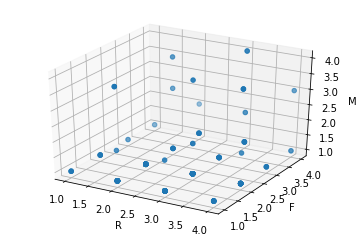

In [45]:
# 시각화 / 플롯을 시각화해 보여줌
pyplot.show()